In [69]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../offers.csv')
df.punk_id = df.punk_id.astype(int)
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Txn'] = df['Txn'].astype('datetime64')
#df.set_index('punk_id',inplace=True)
df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0


In [3]:
df.shape

(92823, 8)

In [4]:
punks = pd.read_csv('../Fase1_ETL/to_database/raw_punks.csv')
punks.drop('Unnamed: 0',axis=1,inplace=True)
#punks.set_index('id',inplace=True)

In [5]:
punks.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,2,Female,8090,Light,1,Wild Hair,0,NaN
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN


In [6]:
punks.shape,df.shape

((10000, 8), (92823, 8))

In [7]:
aggregated_df = df.merge(punks, how='left',left_on='punk_id',right_on='id',left_index=False, right_index=False, sort=False)
aggregated_df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring


In [8]:
aggregated_df.shape

(92823, 16)

In [9]:
aggregated_df.Type.unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered'], dtype=object)

In [10]:
# get punks who have been sold
sold = aggregated_df[aggregated_df.Type == 'Sold']

In [11]:
df_sold = sold[['punk_id','Txn','amount_ethereum','types','skin','rarity','traits','total_traits','total_hidden_traits']].reset_index(drop=True)

In [12]:
df_sold.head()

,punk_id,Txn,amount_ethereum,types,skin,rarity,traits,total_traits,total_hidden_traits
0,0,2018-11-30,25.00,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow",3,1
1,0,2017-07-07,1.60,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow",3,1
2,0,2017-06-23,0.98,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow",3,1
3,1,2020-11-30,60.00,Male,Dark,4352,"Mohawk,Smile",2,0
4,1,2019-04-06,31.00,Male,Dark,4352,"Mohawk,Smile",2,0


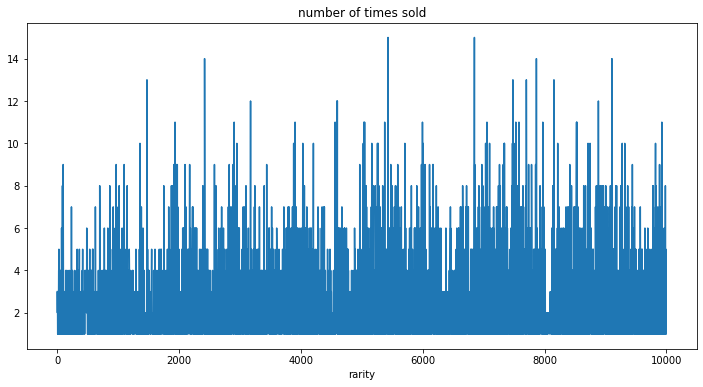

In [13]:
plt.subplots(figsize=(12,6))
df_sold.sort_values(by='rarity').groupby('rarity').count()['types'].plot()
plt.title ('number of times sold')
plt.show()

In [14]:
df_count_sold = df_sold.groupby('punk_id')['types'].count().to_frame(name='total_sold')
df_median_price = df_sold.groupby('punk_id')['amount_ethereum'].mean().to_frame(name='avg_sold_price')
df_max_price = df_sold.groupby('punk_id')['amount_ethereum'].max().to_frame(name='max_sold_price')

In [15]:
df_counts = pd.concat([df_count_sold,df_median_price,df_max_price,punks],axis=1)
df_counts.head(2)

,total_sold,avg_sold_price,max_sold_price,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,3.0,9.193333,25.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,3.0,30.473333,60.0,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN


In [16]:
df_counts = df_counts[['id','total_sold','avg_sold_price','max_sold_price','types','rarity','skin','traits','total_traits','total_hidden_traits']]

In [17]:
df_counts[df_counts.id == 2201]

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,total_hidden_traits
2201,2201,NaN,NaN,NaN,Female,136,Mid,"Choker,Frumpy Hair",2,0


In [18]:
#df_counts.fillna(0,inplace=True)
df_counts.dropna(inplace=True) # remove those who have not been sold
df_counts.head(10)
df_counts['marcador'] = 1
df_counts.head(10)

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,total_hidden_traits,marcador
0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3,1,1
1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2,0,1
14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3,0,1
33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1,0,1
53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2,0,1
89,89,3.0,13.830000,20.00,Female,125,Dark,Choker,1,0,1
116,116,2.0,1.800000,2.40,Female,220,Dark,"Black Lipstick,Clown Eyes Blue,Earring,Tiara",4,0,1
118,118,2.0,20.350000,20.45,Female,9954,Light,"Bandana,Black Lipstick",2,0,1
124,124,3.0,17.300000,19.90,Male,6760,Mid,"Earring,Normal Beard Black,Peak Spike",3,0,1
138,138,4.0,14.925000,15.95,Male,9806,Light,"Horned Rim Glasses,Stringy Hair",2,0,1


In [19]:
df_counts.shape

(5615, 11)

skin
Mid       0.309172
Light     0.301870
Dark      0.283882
Albino    0.093500
Zombie    0.007658
Ape       0.002850
Alien     0.001069
Name: total_sold, dtype: float64


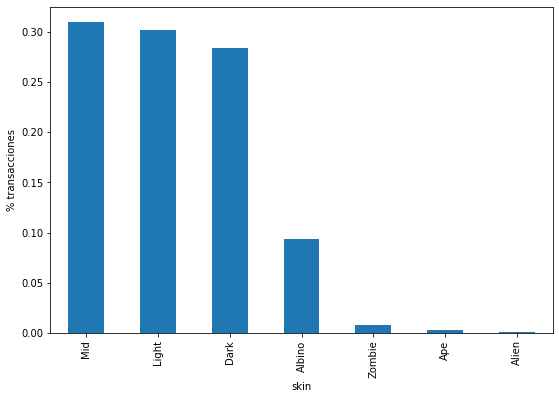

In [20]:
fig, ax = plt.subplots(figsize=(9,6))
df_plot = df_counts.groupby('skin')['total_sold'].count().sort_values(ascending=False)/df_counts.shape[0]
print(df_plot)
df_plot.plot(kind='bar',legend=False,ax=ax)
plt.ylabel('% transacciones')
plt.xlabel('skin')
#plt.title('Human punks')
plt.show()

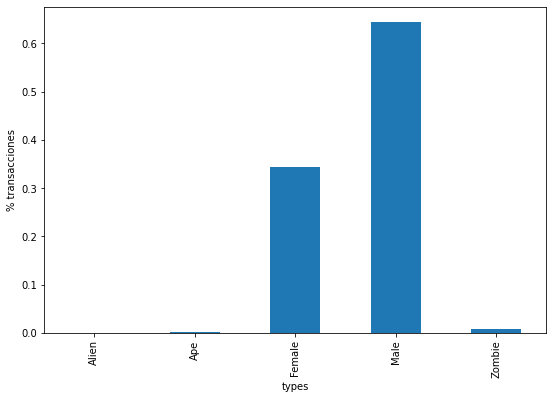

In [21]:
fig, ax = plt.subplots(figsize=(9,6))
df_plot = df_counts.groupby('types')['marcador'].count()/df_counts.shape[0]
df_plot.plot(kind='bar',legend=False,ax=ax)
plt.ylabel('% transacciones')
plt.xlabel('types')
#plt.title('Human punks')
plt.show()

In [22]:
df_humanos = df_counts[(df_counts.types =='Male') | (df_counts.types == 'Female')]
df_no_humanos = df_counts[(df_counts.types =='Ape') | (df_counts.types == 'Alien') |(df_counts.types =='Zombie')]

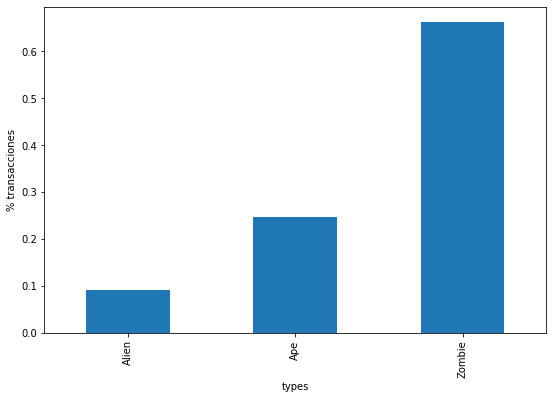

In [23]:
fig, ax = plt.subplots(figsize=(9,6))
df_plot = df_no_humanos.groupby('types')['marcador'].count()/df_no_humanos.shape[0]
df_plot.plot(kind='bar',legend=False,ax=ax)
plt.ylabel('% transacciones')
plt.xlabel('types')
#plt.title('Human punks')
plt.show()

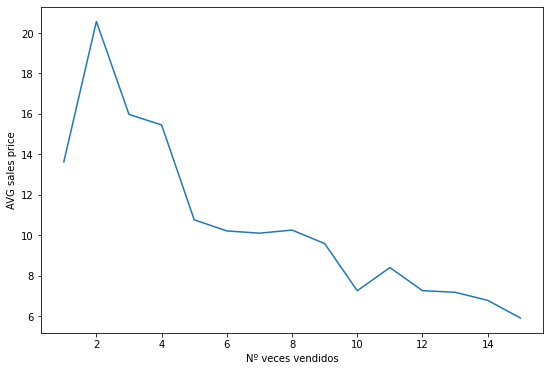

In [24]:
fig, ax = plt.subplots(figsize=(9,6))
df_counts.groupby('total_sold')[['avg_sold_price']].mean().sort_values(by='total_sold').plot(kind='line',legend=False,ax=ax)
plt.ylabel('AVG sales price')
plt.xlabel('Nº veces vendidos')
#plt.ylim([5,17])
plt.show()

In [25]:
# analisis los mas vendidos

In [26]:
def remove_outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    #print(f'25% at {Q1}, and 75% at {Q3}')
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [27]:
def get_means_of_price(data):
    means_price = []
    for i in range(5000):
        price_samples= data.sample(n=10, replace=True) # take a sample of 300 values with replacement
        means_price.append(price_samples.mean())
    return means_price

In [28]:
df_ventas = df_counts.sort_values(by='total_sold',ascending=False)[:100]
df_otros = df_counts.sort_values(by='total_sold',ascending=False)[100:]

In [29]:
variable_to_explore= 'avg_sold_price'
upper_ventas, lower = remove_outliers(df_ventas, variable_to_explore)
upper_otros, lower = remove_outliers(df_otros, variable_to_explore)

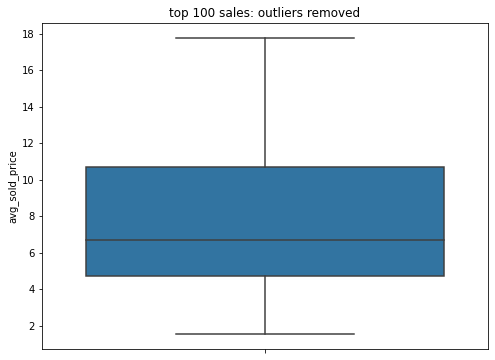

In [30]:
fig,ax = plt.subplots(figsize=(8,6))
#display(df_otros.head())
#display(df_otros.types.unique())
sns.boxplot(y=variable_to_explore,data=df_ventas[~(df_ventas[variable_to_explore]>upper_ventas)],ax=ax)
plt.title('top 100 sales: outliers removed')
#plt.ylim([0,900])
plt.show()

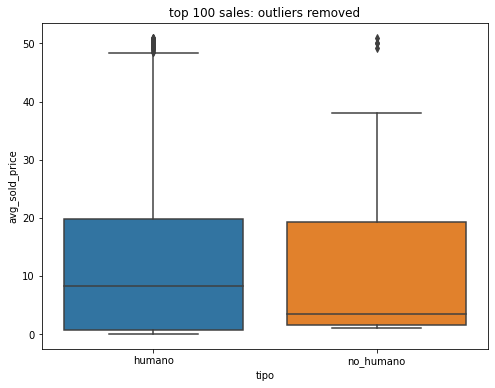

In [31]:
fig,ax = plt.subplots(figsize=(8,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'no_humano','Zombie':'no_humano','Alien':'no_humano'})

sns.boxplot(x='tipo',y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('top 100 sales: outliers removed')
#plt.ylim([0,900])
plt.show()

In [32]:
data1 = df_ventas[~(df_ventas[variable_to_explore]>upper_ventas)][variable_to_explore]
data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]

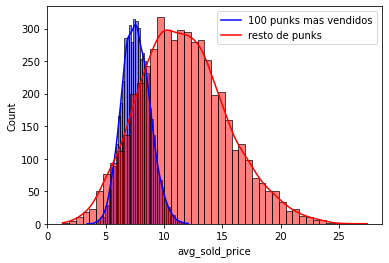

In [33]:
sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.xlabel('avg_sold_price')
plt.legend(['100 punks mas vendidos','resto de punks'])

In [34]:
# analizamos los 100 mas caros

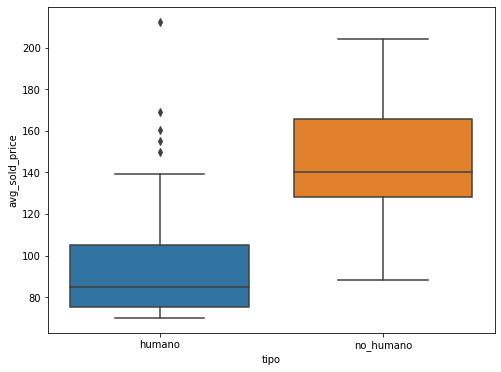

In [35]:
df_caros = df_counts.sort_values(by='avg_sold_price',ascending=False)[:100]
df_otros = df_counts.sort_values(by='avg_sold_price',ascending=False)[100:]

upper_caros, lower = remove_outliers(df_caros, variable_to_explore)
upper_otros, lower = remove_outliers(df_otros, variable_to_explore)

fig,ax = plt.subplots(figsize=(8,6))
df_caros['tipo'] = df_caros.types.map({'Male':'humano','Female':'humano','Ape':'no_humano','Zombie':'no_humano','Alien':'no_humano'})
sns.boxplot(x='tipo',y=variable_to_explore,data=df_caros[~(df_caros[variable_to_explore]>upper_caros)],ax=ax)

plt.show()

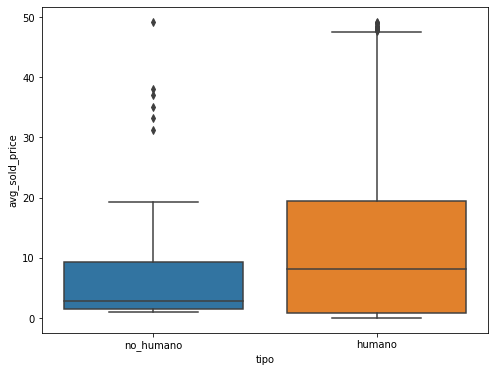

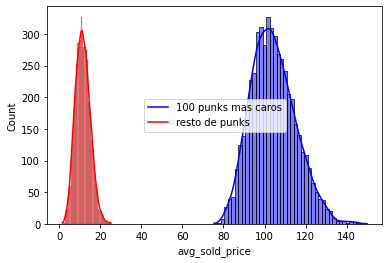

In [36]:
fig,ax = plt.subplots(figsize=(8,6))
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'no_humano','Zombie':'no_humano','Alien':'no_humano'})
sns.boxplot(x='tipo',y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.show()

data1 = df_caros[~(df_caros[variable_to_explore]>upper_caros)][variable_to_explore]
data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]

sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.xlabel('avg_sold_price')
plt.legend(['100 punks mas caros','resto de punks'])

df_counts.to_csv('../Fase3_ML/dataset.csv')

In [37]:
# vamos a analizar la venta de los mas raros
df_raros = df_counts[df_counts.rarity<101].sort_values(by = 'rarity')
df_otros = df_counts[df_counts.rarity>101].sort_values(by = 'rarity')
print(df_raros.shape,df_otros.shape)

(65, 11) (5549, 11)


In [38]:
print(df_raros[['avg_sold_price']].describe().round(2))
print(df_otros[['avg_sold_price']].describe().round(2))

       avg_sold_price
count           65.00
mean           124.59
std            367.97
min              0.05
25%              2.28
50%             30.24
75%             88.50
max           2106.00
       avg_sold_price
count         5549.00
mean            14.06
std             21.28
min              0.00
25%              0.92
50%              8.80
75%             20.93
max            500.00


In [39]:
df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
df_raros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,total_hidden_traits,marcador,tipo
8348,8348,3.0,37.633333,85.0,Male,1,Mid,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",7,0,1,humano
7523,7523,1.0,8.000000,8.0,Alien,11,Alien,"Earring,Knitted Cap,Medical Mask",3,0,1,rest
7804,7804,2.0,2106.000000,4200.0,Alien,12,Alien,"Cap Forward,Pipe,Small Shades",3,0,1,rest
2890,2890,2.0,306.500000,605.0,Alien,14,Alien,Cap,1,0,1,rest
3100,3100,2.0,2104.000000,4200.0,Alien,15,Alien,Headband,1,0,1,rest
...,...,...,...,...,...,...,...,...,...,...,...,...
9703,9703,1.0,2.500000,2.5,Male,94,Dark,"Beanie,Mole",2,0,1,humano
8562,8562,9.0,42.067778,105.0,Male,96,Dark,"Beanie,Earring",2,0,1,humano
5684,5684,4.0,13.625000,44.0,Female,98,Dark,"Choker,Pilot Helmet",2,0,1,humano
5787,5787,1.0,2.100000,2.1,Female,99,Mid,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",4,0,1,humano


In [40]:
df_raros.total_sold.unique()

array([3., 1., 2., 4., 5., 6., 8., 9.])

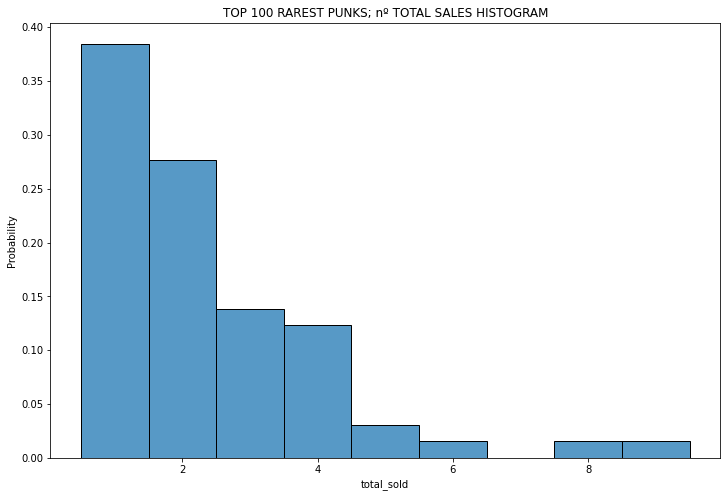

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,total_hidden_traits,marcador,tipo
8348,8348,3.0,37.633333,85.0,Male,1,Mid,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",7,0,1,humano
7523,7523,1.0,8.000000,8.0,Alien,11,Alien,"Earring,Knitted Cap,Medical Mask",3,0,1,rest
7804,7804,2.0,2106.000000,4200.0,Alien,12,Alien,"Cap Forward,Pipe,Small Shades",3,0,1,rest
2890,2890,2.0,306.500000,605.0,Alien,14,Alien,Cap,1,0,1,rest
3100,3100,2.0,2104.000000,4200.0,Alien,15,Alien,Headband,1,0,1,rest
...,...,...,...,...,...,...,...,...,...,...,...,...
9703,9703,1.0,2.500000,2.5,Male,94,Dark,"Beanie,Mole",2,0,1,humano
8562,8562,9.0,42.067778,105.0,Male,96,Dark,"Beanie,Earring",2,0,1,humano
5684,5684,4.0,13.625000,44.0,Female,98,Dark,"Choker,Pilot Helmet",2,0,1,humano
5787,5787,1.0,2.100000,2.1,Female,99,Mid,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",4,0,1,humano


In [41]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_raros['total_sold'],bins=50,stat='probability',ax=ax,discrete=True)
plt.title ('TOP 100 RAREST PUNKS; nº TOTAL SALES HISTOGRAM')
plt.show()
df_raros

In [42]:
mediana = df_raros[variable_to_explore].mean()
std = df_raros[variable_to_explore].std()
perc_75 = df_raros[variable_to_explore].quantile(.75)
print(mediana,std,perc_75)
upper_raros, lower = remove_outliers(df_raros, variable_to_explore)
print(upper_raros,lower)

124.59248632478632 367.9736813865542 88.5
217.833 -127.05499999999999


fig,ax = plt.subplots(figsize=(16,9))
sns.histplot(data=df_raros.avg_bid_price,bins=50,stat='frequency',ax=ax)
plt.show()

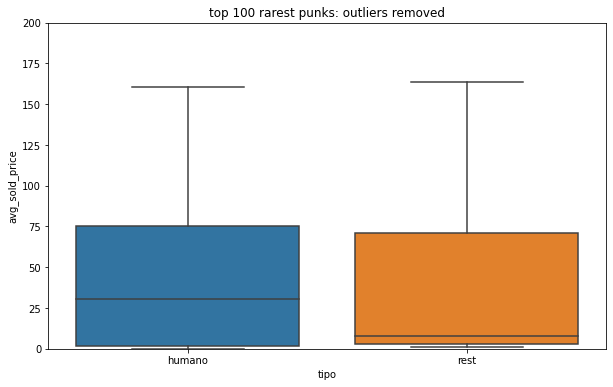

In [43]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="tipo", y=variable_to_explore,data=df_raros[~(df_raros[variable_to_explore]>upper_raros)],ax=ax)
sns.catplot
plt.title('top 100 rarest punks: outliers removed')
plt.ylim([0,200])
plt.show()

In [44]:
mediana = df_otros[variable_to_explore].mean()
std = df_otros[variable_to_explore].std()
perc_75 = df_otros[variable_to_explore].quantile(0.75)
print(mediana,std,perc_75)
upper_otros, lower = remove_outliers(df_otros, variable_to_explore)
print(upper_otros,lower)

14.060171419327801 21.28429411395847 20.933333333333334
50.95333333333333 -29.1


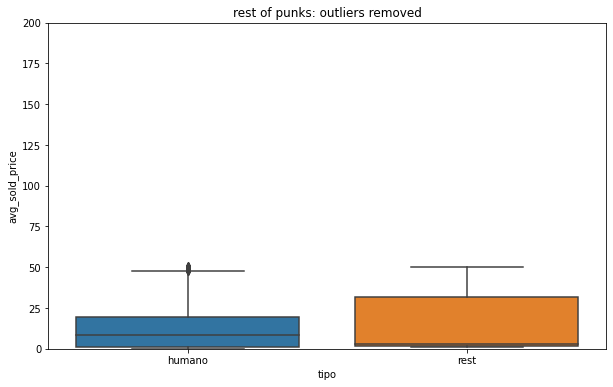

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('rest of punks: outliers removed')
plt.ylim([0,200])
plt.show()

In [46]:
data1 = df_raros[~(df_raros[variable_to_explore]>upper_raros)][variable_to_explore]

data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]

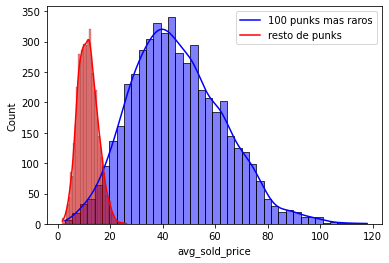

In [47]:
# Segun la teoria del Central Limit Theory (CLT), la media de las muestras tiene una distrubucion Normal
sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.xlabel('avg_sold_price')
plt.legend(['100 punks mas raros','resto de punks'])

In [48]:
from scipy.stats import ttest_ind

In [49]:
res = ttest_ind(a=data1,b=data2)
print(res)

Ttest_indResult(statistic=20.185895167592644, pvalue=2.0043920874118916e-87)


In [50]:
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('WE reject NULL hypothesis that both dist are equal')
else:
    print('WE cannot reject NULL hypothesis that both distributions are equal')


P-value is 0.0% and significance level (alpha) is 5% 
WE reject NULL hypothesis that both dist are equal


In [51]:
# analizamos nº de traits con el precio

In [52]:
df_counts.total_traits.value_counts()

3    2616
2    1959
4     819
1     118
5      95
6       7
7       1
Name: total_traits, dtype: int64

In [53]:
df_humanos = df_counts[(df_counts.types =='Female') | (df_counts.types == 'Male')]
df_no_humanos = df_counts[(df_counts.types =='Alien') | (df_counts.types == 'Zombie') | (df_counts.types == 'Ape')]

In [54]:
df_humanos.types.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# analizamos propiedades de los mas raros

In [ ]:
df_raros = df_counts[df_counts.rarity<101].sort_values(by = 'rarity')
df_otros = df_counts[df_counts.rarity>101].sort_values(by = 'rarity')

In [67]:
df_humanos = df_counts[(df_counts.types =='Female') | (df_counts.types == 'Male')]
df_no_humanos = df_counts[(df_counts.types =='Alien') | (df_counts.types == 'Zombie') | (df_counts.types == 'Ape')]

In [81]:
df_counts.total_traits.value_counts()

3    2616
2    1959
4     819
1     118
5      95
6       7
7       1
Name: total_traits, dtype: int64

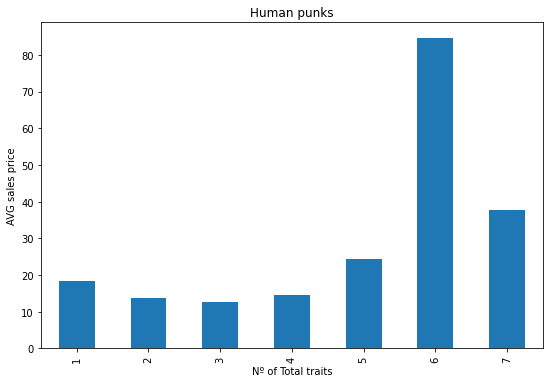

In [75]:
fig, ax = plt.subplots(figsize=(9,6))
df_humanos.groupby('total_traits')[['avg_sold_price']].mean().plot(kind='bar',legend=False,ax=ax)
plt.ylabel('AVG sales price')
plt.xlabel('Nº of Total traits')
#plt.hlines(15,-1,7, color='red',linestyles='dashed')
plt.title('Human punks')
plt.show()

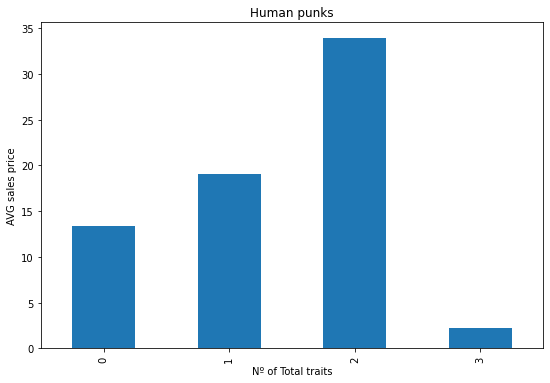

In [76]:
fig, ax = plt.subplots(figsize=(9,6))
df_humanos.groupby('total_hidden_traits')[['avg_sold_price']].mean().plot(kind='bar',legend=False,ax=ax)
plt.ylabel('AVG sales price')
plt.xlabel('Nº of Total traits')
#plt.hlines(15,-1,7, color='red',linestyles='dashed')
plt.title('Human punks')
plt.show()


In [82]:
def convert_str2list(text):
    #print(text)
    try:
        items = text.split(',')        
        return items
    except:
        return 'None'
    
#df1.traits.apply(convert_str2list)
convert_str2list('Blonde Bob,Earring,Green Eye Shadow')

['Blonde Bob', 'Earring', 'Green Eye Shadow']

In [87]:
df3 = df_counts.copy()


In [88]:
df3.traits = df3['traits'].apply(convert_str2list)

In [90]:
df_exploded =df3.explode('traits')
df_exploded.reset_index(inplace=True)
df_exploded['_helper'] = 1

df_wide = df_exploded.pivot(index='index', columns='traits',values='_helper')
df_wide.fillna(0,inplace=True)

df_n = pd.concat([df3,df_wide],axis=1)
df_n.drop('traits',axis=1,inplace=True)
df_n

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,total_traits,total_hidden_traits,marcador,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Dark Hair,Do-rag,Earring,Eye Mask,Eye Patch,Fedora,Front Beard,Front Beard Dark,Frown,Frumpy Hair,Goat,Gold Chain,Green Eye Shadow,Half Shaved,Handlebars,Headband,Hoodie,Horned Rim Glasses,Hot Lipstick,Knitted Cap,Luxurious Beard,Medical Mask,Messy Hair,Mohawk,Mohawk Dark,Mohawk Thin,Mole,Mustache,Muttonchops,Nerd Glasses,Normal Beard,Normal Beard Black,Orange Side,Peak Spike,Pigtails,Pilot Helmet,Pink With Hat,Pipe,Police Cap,Purple Eye Shadow,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,3.0,9.193333,25.00,Female,2023,Mid,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3.0,30.473333,60.00,Male,4352,Dark,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,14,3.0,1.750000,2.50,Female,155,Dark,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,33,1.0,0.510000,0.51,Male,7635,Light,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,53,2.0,21.000000,22.00,Female,2825,Light,2,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,9973,1.0,15.850000,15.85,Male,6130,Mid,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9974,9974,1.0,10.000000,10.00,Female,2488,Mid,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [92]:
#get traits 
def get_traits(dataframe,column):
    traits ={}
    for items in dataframe[column].str.split(','):
        for elem in items:        
            if len(elem) ==0:
                #print(type(elem))
                continue            
            if elem in traits:
                #print('exists, add one')
                traits[elem] += 1
            else:
                #print('not exist, create set to one ')
                traits[elem] = 1
    return traits
    

In [97]:
columna = 'traits'
traits = get_traits(df_counts,columna)
traits_raros = get_traits(df_raros,columna)

In [100]:
order_traits = dict(sorted(traits.items(),key= lambda x:x[1],reverse=True))
df_traits = pd.DataFrame(list(order_traits.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_totales = set (df_traits.trait.values)
len(traits_totales),df_traits.head()

(87,
           trait  occurences
 0       Earring        1471
 1     Cigarette         535
 2          Mole         417
 3  Hot Lipstick         366
 4  Nerd Glasses         349)

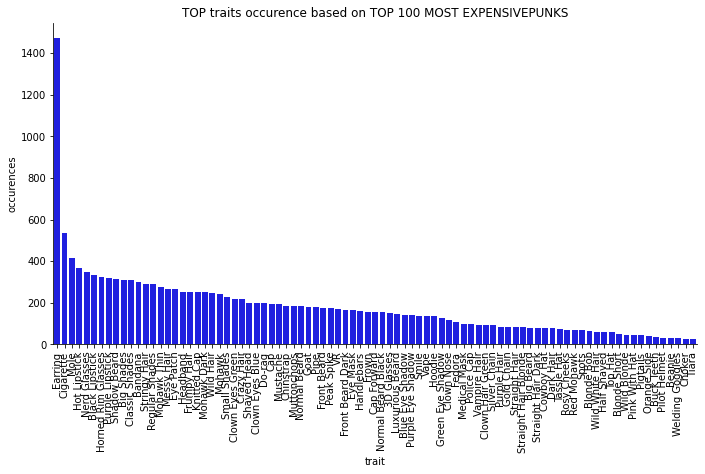

In [95]:
sns.catplot(x='trait',y='occurences',data= df_traits,kind='bar',height=5, aspect=10/5,color='blue')
plt.title('Traits occurences')
plt.xticks(rotation=90)
plt.show()

In [96]:
df_raros = df_counts[df_counts.rarity<101].sort_values(by = 'rarity')

In [104]:
order_traits_raros = dict(sorted(traits_raros.items(),key= lambda x:x[1],reverse=True))
df_traits_raros = pd.DataFrame(list(order_traits_raros.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_raros = set (df_traits_raros.trait.values)
len(traits_raros),df_traits_raros.head()

(53,
          trait  occurences
 0       Beanie          32
 1      Earring          21
 2  Knitted Cap           8
 3         Mole           6
 4    Cigarette           5)

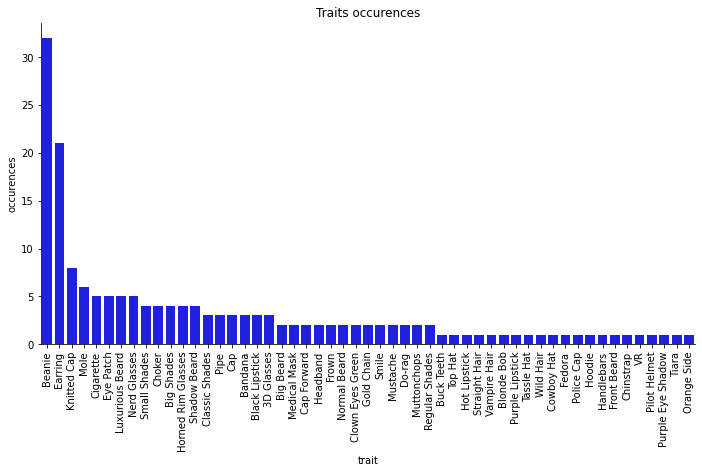

In [105]:
sns.catplot(x='trait',y='occurences',data= df_traits_raros,kind='bar',height=5, aspect=10/5,color='blue')
plt.title('Traits occurences')
plt.xticks(rotation=90)
plt.show()

In [108]:
keep_atributos = list(traits_totales - traits_raros)

In [ ]:
# los traits para los mas caros no son diferentes a los traits del resto

In [ ]:
traits_raros = ['Beanie', 'Luxurious Beard', 'Do-rag', 'Choker', 'Gold Chain',
       'Muttonchops', 'Cowboy Hat', 'Medical Mask', 'Cap Forward',
       'Frown', 'Mustache', '3D Glasses', 'Big Beard', 'Top Hat',
       'Chinstrap', 'Clown Nose', 'Blonde Bob', 'Normal Beard', 'Smile',
       'Front Beard', 'Buck Teeth', 'Straight Hair', 'Silver Chain',
       'Spots', 'Rosy Cheeks', 'Vampire Hair', 'Tassle Hat', 'Goat',
       'Fedora', 'Police Cap', 'Hoodie', 'Eye Mask', 'Vape', 'Handlebars',
       'Pilot Helmet', 'Purple Eye Shadow', 'Tiara', 'Orange Side']

In [109]:
def atribute_present(traits):
    global keep_atributos    
    lista = traits.split(',')    
    for trait in lista:
        #print(trait)
        if trait in traits_raros:
            #print(trait)
            return True
        
    return False    

In [110]:
df_counts[~(df_counts.traits.apply(atribute_present))] # atribute not present

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,total_hidden_traits,marcador
33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1,0,1
155,155,3.0,14.666667,25.00,Male,2455,Dark,"Clown Hair Green,Clown Nose",2,0,1
241,241,1.0,5.000000,5.00,Female,1590,Light,Wild Blonde,1,0,1
335,335,2.0,36.500000,40.00,Male,2561,Mid,Clown Hair Green,1,0,1
346,346,1.0,0.470000,0.47,Male,3218,Mid,Purple Hair,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9690,9690,5.0,3.676000,8.40,Male,7171,Dark,"Eye Mask,Frumpy Hair",2,0,1
9713,9713,2.0,10.075000,18.95,Female,8512,Light,"Clown Eyes Blue,Mohawk Dark",2,0,1
9747,9747,2.0,13.985000,14.97,Female,5788,Mid,"Green Eye Shadow,Mohawk Thin",2,0,1
9846,9846,3.0,2.516667,5.00,Female,5669,Dark,"Blue Eye Shadow,Mohawk Thin",2,0,1


In [111]:
# vamos a analizar la venta de los que tienen atributos mas raros
df_raros = df_counts[df_counts.traits.apply(atribute_present)][df_counts.rarity<100].sort_values(by='rarity')
df_otros = df_counts[~(df_counts.traits.apply(atribute_present))][df_counts.rarity>100].sort_values(by='rarity')

df_raros = df_counts[df_counts.traits.apply(atribute_present)]
df_otros = df_counts[~(df_counts.traits.apply(atribute_present))]



<ipython-input-111-205c58af8d2d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_raros = df_counts[df_counts.traits.apply(atribute_present)][df_counts.rarity<100].sort_values(by='rarity')
<ipython-input-111-205c58af8d2d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_otros = df_counts[~(df_counts.traits.apply(atribute_present))][df_counts.rarity>100].sort_values(by='rarity')


In [ ]:
df_otros

<ipython-input-113-fa2cba3eae92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})


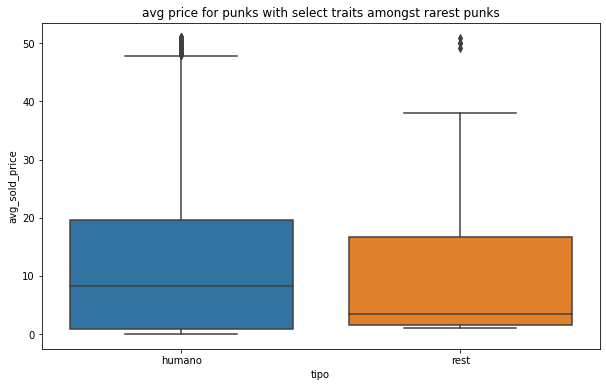

In [113]:
upper_raros, lower = remove_outliers(df_raros, variable_to_explore)


fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_raros[~(df_raros[variable_to_explore]>upper_raros)],ax=ax)
plt.title('avg price for punks with select traits amongst rarest punks')
#plt.ylim([0,900])
plt.show()

<ipython-input-115-f69fc92f21f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})


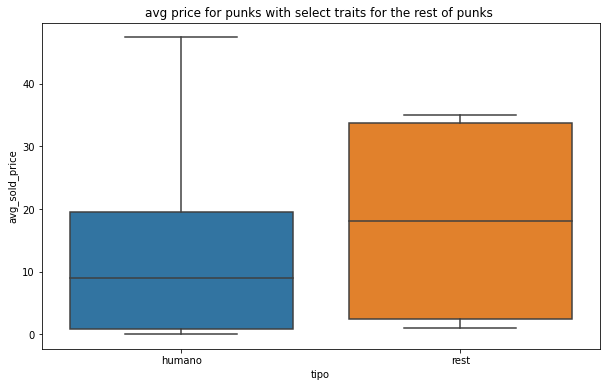

In [115]:
upper_otros, lower = remove_outliers(df_otros, variable_to_explore)


fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('avg price for punks with select traits for the rest of punks ')
#plt.ylim([0,900])
plt.show()

In [116]:
data1 = df_raros[~(df_raros[variable_to_explore]>upper_raros)][variable_to_explore]

data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]


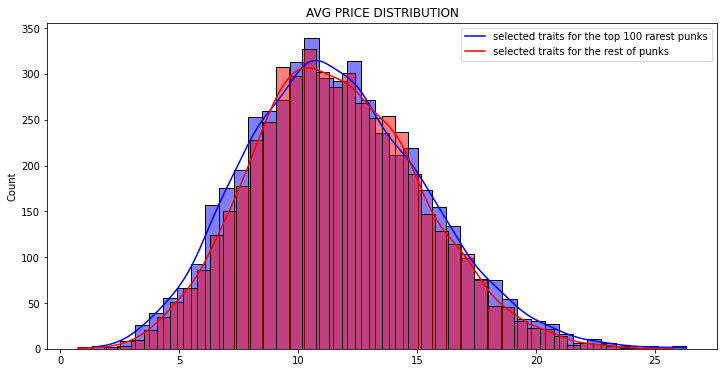

In [117]:
gix,ax = plt.subplots(figsize=(12,6))

sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.legend(['selected traits for the top 100 rarest punks','selected traits for the rest of punks'])
plt.title('AVG PRICE DISTRIBUTION')
plt.show()

In [118]:
res = ttest_ind(a=data2,b=data1)
print(res)
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('reject NULL hypothesis, conclusion: dist are different')
else:
    print('cannot reject NULL hypothesis, conclusion: dist are equal')

Ttest_indResult(statistic=0.006169100430932059, pvalue=0.9950780291557642)
P-value is 99.51% and significance level (alpha) is 5% 
cannot reject NULL hypothesis, conclusion: dist are equal


In [119]:
df_raros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,total_hidden_traits,marcador,tipo
0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3,1,1,humano
1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2,0,1,humano
14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3,0,1,humano
53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2,0,1,humano
89,89,3.0,13.830000,20.00,Female,125,Dark,Choker,1,0,1,humano
...,...,...,...,...,...,...,...,...,...,...,...,...
9972,9972,2.0,3.495000,5.99,Male,5312,Light,"Big Shades,Frown,Frumpy Hair",3,0,1,humano
9973,9973,1.0,15.850000,15.85,Male,6130,Mid,"Chinstrap,Do-rag,Eye Patch",3,0,1,humano
9976,9976,3.0,0.733333,1.50,Female,2139,Light,"Half Shaved,Pipe",2,0,1,humano
9979,9979,3.0,4.066667,6.20,Male,7564,Light,"Cigarette,Earring,Nerd Glasses,Shaved Head",4,0,1,humano


In [ ]:
df_raros['keep']= df_raros.traits.apply(atribute_present)

In [ ]:
df_new = df_raros[df_raros.keep == True]

In [ ]:
sns.catplot(x='trait',y='occurences',data= df_new,kind='bar',height=5, aspect=10/5,color='orange')
plt.title('traits from rarest punks not amongst the top 30 most common traits')
plt.xticks(rotation=90)
plt.show()